#**Tugas Besar Machine Learning**
## **Kepala DSDABM Surabaya Pastikan Genangan Surut Kurang dari 20 Menit**
### **Nama Kelompok [..]**

In [ ]:
import pandas as pd
import numpy as np
import numpy as df
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pandas.plotting import scatter_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
pd.read_csv('/content/drive/My Drive/datamining/data genangan air Surabaya.csv')
df = pd.read_csv('/content/drive/My Drive/datamining/data genangan air Surabaya.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,_id,Lokasi,Kecamatan,Kelurahan,Rayon,Luas genangan,Tinggi genangan,Lama genangan,Skor Luas Genangan,Skor Tinggi Genangan,Skor Lama Genangan
0,1,Jl. Pakis Agosari (Yamaha),Dukuh Pakis,Dukuh Pakis,Rayon Wiyung,10.800000,10,40,100,25,25
1,2,Jl. Mayjend Sungkono - Darmo Park I,Dukuh Pakis,Dukuh Pakis,Rayon Wiyung,0.816236,25,58,75,50,25
2,3,Jl. Mayjend Sungkono (Pom Bensin),Dukuh Pakis,Dukuh Pakis,Rayon Wiyung,0.509047,15,16,75,50,0
3,4,Kp. Kebraon,Karangpilang,Warugunung,Rayon Wiyung,0.785111,10,40,75,25,25
4,5,Jl. Lakar Santri RW.001,Lakarsantri,Bangkingan,Rayon Wiyung,0.749717,30,16,75,50,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _id                   244 non-null    int64  
 1   Lokasi                244 non-null    object 
 2   Kecamatan             244 non-null    object 
 3   Kelurahan             244 non-null    object 
 4   Rayon                 244 non-null    object 
 5   Luas genangan         244 non-null    float64
 6   Tinggi genangan       244 non-null    int64  
 7   Lama genangan         244 non-null    int64  
 8   Skor Luas Genangan    244 non-null    int64  
 9   Skor Tinggi Genangan  244 non-null    int64  
 10  Skor Lama Genangan    244 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 21.1+ KB


In [ ]:
df.shape

(244, 11)

### Normalisasi Data

In [ ]:
df.isnull().sum()

_id                     0
Lokasi                  0
Kecamatan               0
Kelurahan               0
Rayon                   0
Luas genangan           0
Tinggi genangan         0
Lama genangan           0
Skor Luas Genangan      0
Skor Tinggi Genangan    0
Skor Lama Genangan      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


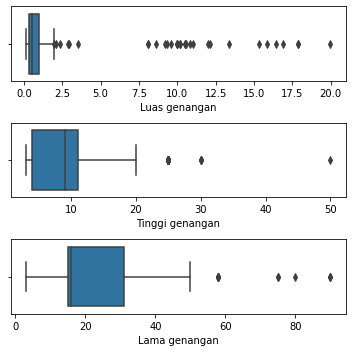

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['Luas genangan'], ax = axs[0])
plt2 = sns.boxplot(df['Tinggi genangan'], ax = axs[1])
plt3 = sns.boxplot(df['Lama genangan'], ax = axs[2])
plt.tight_layout()

Cek persebaran data

In [ ]:
df.describe()

,_id,Luas genangan,Tinggi genangan,Lama genangan,Skor Luas Genangan,Skor Tinggi Genangan,Skor Lama Genangan
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,122.500000,1.854777,10.922131,22.040984,67.315574,24.795082,7.172131
std,70.580923,3.741298,7.146187,16.531749,18.421974,18.143207,12.619596
min,1.000000,0.131661,3.000000,3.000000,50.000000,0.000000,0.000000
25%,61.750000,0.324975,4.000000,15.000000,50.000000,0.000000,0.000000
50%,122.500000,0.527731,9.000000,16.000000,75.000000,25.000000,0.000000
75%,183.250000,0.983013,11.000000,31.000000,75.000000,31.250000,25.000000
max,244.000000,19.980000,50.000000,90.000000,100.000000,75.000000,50.000000


Nilai Maximum dari masing-masing Variable adalah: 
Luas genangan       1.97007
Tinggi genangan    21.50000
Lama genangan      55.00000
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
Luas genangan     -0.662081
Tinggi genangan   -6.500000
Lama genangan     -9.000000
dtype: float64

Persebaran data setelah ditangani Outlier: 
       Luas genangan  Tinggi genangan  Lama genangan
count     244.000000       244.000000     244.000000
mean        0.760167        10.293033      21.258197
std         0.589484         5.609295      14.128851
min         0.131661         3.000000       3.000000
25%         0.324975         4.000000      15.000000
50%         0.527731         9.000000      16.000000
75%         0.983013        11.000000      31.000000
max         1.970070        21.500000      55.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr

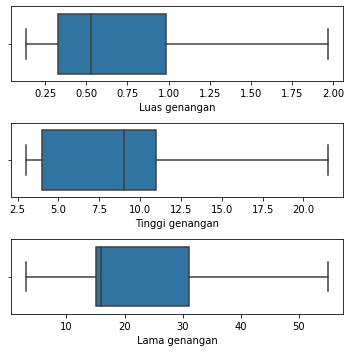

In [ ]:
Q1 = (df[['Luas genangan','Tinggi genangan','Lama genangan']]).quantile(0.25)
Q3 = (df[['Luas genangan','Tinggi genangan','Lama genangan']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (df > maximum)
lower_than = (df< minimum)
df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(df[['Luas genangan','Tinggi genangan','Lama genangan']].describe())
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['Luas genangan'], ax = axs[0])
plt2 = sns.boxplot(df['Tinggi genangan'], ax = axs[1])
plt3 = sns.boxplot(df['Lama genangan'], ax = axs[2])
plt.tight_layout()

Perbaikan penyebaran data dengan metode interquartile range

<function matplotlib.pyplot.show>

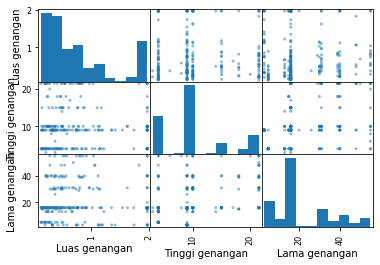

In [ ]:
scatter_matrix(df[['Luas genangan','Tinggi genangan','Lama genangan']])
plt.show

In [ ]:
df.corr()

,_id,Luas genangan,Tinggi genangan,Lama genangan,Skor Luas Genangan,Skor Tinggi Genangan,Skor Lama Genangan
_id,1.000000,0.024506,-0.204766,-0.178456,-0.010880,-0.172571,-0.127171
Luas genangan,0.024506,1.000000,-0.003604,0.036573,0.932414,0.008854,0.072344
Tinggi genangan,-0.204766,-0.003604,1.000000,0.318252,0.039802,0.943769,0.261591
Lama genangan,-0.178456,0.036573,0.318252,1.000000,0.076826,0.277533,0.866623
Skor Luas Genangan,-0.010880,0.932414,0.039802,0.076826,1.000000,0.049136,0.116348
Skor Tinggi Genangan,-0.172571,0.008854,0.943769,0.277533,0.049136,1.000000,0.231115
Skor Lama Genangan,-0.127171,0.072344,0.261591,0.866623,0.116348,0.231115,1.000000


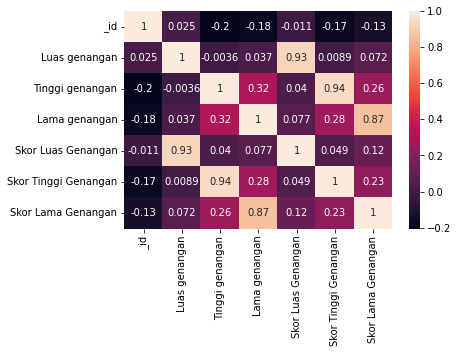

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.show()

menghitung korelasi dari setiap variabel

In [ ]:
df.keys()

Index(['_id', 'Lokasi', 'Kecamatan', 'Kelurahan', 'Rayon', 'Luas genangan',
       'Tinggi genangan', 'Lama genangan', 'Skor Luas Genangan',
       'Skor Tinggi Genangan', 'Skor Lama Genangan'],
      dtype='object')

In [ ]:
df._id[0]

1

## K-Means

## MixMaxScaler

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

In [ ]:
array_x=df[['Luas genangan','Tinggi genangan','Lama genangan']]

In [ ]:
scaler_fit = MinMaxScaler()
scaled_x = scaler_fit.fit_transform(array_x)
scaled_x

array([[1.00000000e+00, 3.78378378e-01, 7.11538462e-01],
       [3.72373638e-01, 1.00000000e+00, 1.00000000e+00],
       [2.05278600e-01, 6.48648649e-01, 2.50000000e-01],
       [3.55443236e-01, 3.78378378e-01, 7.11538462e-01],
       [3.36190718e-01, 1.00000000e+00, 2.50000000e-01],
       [5.68047736e-01, 5.40540541e-02, 2.50000000e-01],
       [1.00000000e+00, 3.78378378e-01, 2.50000000e-01],
       [2.74933399e-02, 3.78378378e-01, 2.50000000e-01],
       [4.00329878e-02, 5.40540541e-02, 2.50000000e-01],
       [6.90749494e-02, 1.00000000e+00, 2.50000000e-01],
       [4.84054452e-02, 1.00000000e+00, 2.50000000e-01],
       [2.92856506e-02, 1.00000000e+00, 2.50000000e-01],
       [1.42703293e-01, 6.48648649e-01, 7.11538462e-01],
       [5.38104996e-01, 3.78378378e-01, 7.11538462e-01],
       [2.25491187e-01, 1.00000000e+00, 1.00000000e+00],
       [3.04121138e-01, 1.00000000e+00, 9.03846154e-01],
       [5.06318269e-02, 1.00000000e+00, 7.11538462e-01],
       [1.00000000e+00, 3.78378

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=40)

In [ ]:
kmeans.fit(scaled_x)

KMeans(n_clusters=3, random_state=40)

In [ ]:
print(kmeans.cluster_centers_)

[[0.25116326 0.66151866 0.58150183]
 [0.1878503  0.21713239 0.20257497]
 [0.95603304 0.35714286 0.30769231]]


In [ ]:
df["kluster"]= kmeans.labels_

In [ ]:
print(kmeans.labels_)

[2 0 0 0 0 1 2 1 1 0 0 0 0 0 0 0 0 2 1 0 0 2 0 0 0 0 1 1 1 1 1 2 0 1 1 1 2
 0 0 2 0 1 2 0 0 0 0 0 0 1 2 1 2 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 2 2 0 1 1 2
 1 0 0 2 2 2 1 0 0 0 2 2 0 0 1 1 1 1 1 0 1 2 2 1 0 2 2 1 1 2 1 2 0 0 0 0 1
 1 1 0 0 1 1 2 2 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 0
 1 0 0 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 0
 0 0 0 0 2 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 2
 2 1 1 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2]


In [ ]:
print(df.kluster)

0      2
1      0
2      0
3      0
4      0
      ..
239    1
240    1
241    2
242    2
243    2
Name: kluster, Length: 244, dtype: int32


In [ ]:
sum(df['kluster']==2)

42

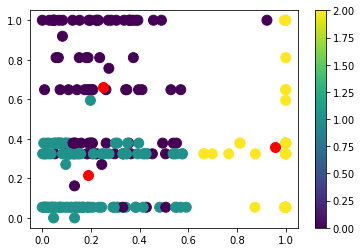

In [ ]:
output = plt.scatter(scaled_x[:,0],scaled_x[:,1], s=100, c=df.kluster)
centers= kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],c='red',s=100, alpha=1, marker="o");
plt.colorbar(output)
plt.show()

In [ ]:
print(df)

     _id                               Lokasi      Kecamatan      Kelurahan  \
0      1           Jl. Pakis Agosari (Yamaha)    Dukuh Pakis    Dukuh Pakis   
1      2  Jl. Mayjend Sungkono - Darmo Park I    Dukuh Pakis    Dukuh Pakis   
2      3    Jl. Mayjend Sungkono (Pom Bensin)    Dukuh Pakis    Dukuh Pakis   
3      4                          Kp. Kebraon   Karangpilang     Warugunung   
4      5              Jl. Lakar Santri RW.001    Lakarsantri     Bangkingan   
..   ...                                  ...            ...            ...   
239  240                            Jl. Kanwa      WONOKROMO          DARMO   
240  241                 Per. Rungkut Harapan        Rungkut  Rungkut Kidul   
241  242                        TANJUNGSARI I  SUKOMANUNGGAL    TANJUNGSARI   
242  243                       Jl. Karangrejo      Wonokromo      Wonokromo   
243  244                       Kp. Tambakdono         Benowo     Tambakdono   

               Rayon  Luas genangan  Tinggi genanga

Standard Scaler

In [ ]:
x = df.iloc[:,5:8] # 1t for rows and second for columns
x

,Luas genangan,Tinggi genangan,Lama genangan
0,1.970070,10.0,40
1,0.816236,21.5,55
2,0.509047,15.0,16
3,0.785111,10.0,40
4,0.749717,21.5,16
...,...,...,...
239,0.334177,9.0,3
240,0.851371,9.0,3
241,1.970070,9.0,15
242,1.970070,9.0,20


In [ ]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [ ]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0], dtype=int32)

In [ ]:
scaler_fit = StandardScaler()
scaled_x = scaler_fit.fit_transform(array_x)
scaled_x

array([[ 2.05669672, -0.05234795,  1.32921832],
       [ 0.09531161,  2.0020347 ,  2.39305805],
       [-0.42687442,  0.84086189, -0.37292524],
       [ 0.04240268, -0.05234795,  1.32921832],
       [-0.01776305,  2.0020347 , -0.37292524],
       [ 0.70680961, -1.12419977, -0.37292524],
       [ 2.05669672, -0.05234795, -0.37292524],
       [-0.9824683 , -0.05234795, -0.37292524],
       [-0.94328084, -1.12419977, -0.37292524],
       [-0.85252227,  2.0020347 , -0.37292524],
       [-0.91711621,  2.0020347 , -0.37292524],
       [-0.97686717,  2.0020347 , -0.37292524],
       [-0.62242751,  0.84086189,  1.32921832],
       [ 0.61323603, -0.05234795,  1.32921832],
       [-0.36370839,  2.0020347 ,  2.39305805],
       [-0.11798319,  2.0020347 ,  2.03844481],
       [-0.91015858,  2.0020347 ,  1.32921832],
       [ 2.05669672, -0.05234795,  0.69091449],
       [-1.00884711, -0.05234795, -0.37292524],
       [-0.76831846, -0.05234795,  1.32921832],
       [-0.46218614,  0.84086189, -0.372

In [ ]:
km = KMeans(n_clusters=3)
km

y_predicted = km.fit_predict(df[['Luas genangan','Tinggi genangan','Lama genangan']])
y_predicted

df['TipePenanganan'] = y_predicted

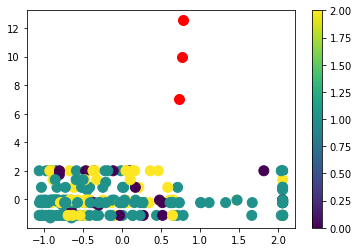

In [ ]:
output = plt.scatter(scaled_x[:,0],scaled_x[:,1], s=100, c=df.TipePenanganan)
centers= kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],c='red',s=100, alpha=1, marker="o");
plt.colorbar(output)
plt.show()

In [ ]:
conditions = [
    (df['TipePenanganan']==0),
    (df['TipePenanganan']==1),
    (df['TipePenanganan']==2)]
choices = ['Tinggi','Sedang','Rendah']
df['TipePenanganan'] = np.select(conditions, choices)

In [ ]:
print(df)

     _id                               Lokasi      Kecamatan      Kelurahan  \
0      1           Jl. Pakis Agosari (Yamaha)    Dukuh Pakis    Dukuh Pakis   
1      2  Jl. Mayjend Sungkono - Darmo Park I    Dukuh Pakis    Dukuh Pakis   
2      3    Jl. Mayjend Sungkono (Pom Bensin)    Dukuh Pakis    Dukuh Pakis   
3      4                          Kp. Kebraon   Karangpilang     Warugunung   
4      5              Jl. Lakar Santri RW.001    Lakarsantri     Bangkingan   
..   ...                                  ...            ...            ...   
239  240                            Jl. Kanwa      WONOKROMO          DARMO   
240  241                 Per. Rungkut Harapan        Rungkut  Rungkut Kidul   
241  242                        TANJUNGSARI I  SUKOMANUNGGAL    TANJUNGSARI   
242  243                       Jl. Karangrejo      Wonokromo      Wonokromo   
243  244                       Kp. Tambakdono         Benowo     Tambakdono   

               Rayon  Luas genangan  Tinggi genanga

In [ ]:
print(df.loc[df['TipePenanganan']=='Tinggi'])

     _id                               Lokasi         Kecamatan  \
1      2  Jl. Mayjend Sungkono - Darmo Park I       Dukuh Pakis   
14    15                    Jl. Jajar Tunggal            Wiyung   
15    16            Jl. H. Abdul Wahab Siamin       Dukuh Pakis   
69    70                      Kp. Sumber Rejo             Pakal   
83    84             Perumahan Kutisari Indah  Tenggilis Mejoyo   
98    99                   Kp. Merisi Selatan          Wonocolo   
108  109                      Jl. Jetis Kulon         Wonokromo   
124  125                            Jl. Randu          Kenjeran   
128  129     Jl. Kalijudan (Perbatasan Ploso)         Mulyorejo   
129  130                  Perumahan Mulyosari         Mulyorejo   
138  139                        Jl. Hang Tuah          Semampir   
147  148                       Kp. Ploso Baru        Tambaksari   
149  150             Jl. Salak dan Sekitarnya        Tambaksari   
150  151                     Kp. Karang Empat        Tambaksar

In [ ]:
sum(df['TipePenanganan']=='Tinggi')

20

In [ ]:
sum(df['TipePenanganan']=='Sedang')

166

In [ ]:
sum(df['TipePenanganan']=='Rendah')

58

## Clustering